## Content
- **Continuiation: Solving the Attrition problem for Jio!**

- **What Are Ensemble Models?**
  - Types of Ensembles
  - Bagging

- **Can we make Emsemble from DTs? - Random Forest**
  - How to use multiple trees?
  - How to introduce randomness? - Row and Column Sampling
  - But how to validate RFs?.
  - Measuring Performance
  - Training RF
  - OOB Score
  - RF using SK-Learn
  - Can we compute Feature Importances?

- **So what are the parameters of RF (Hyper-Parameters)**
  - Number of Trees
  - Row Sample Size
  - Number of Columns Sampled
  - Depth of Base Learners

- **Sklearn Library**


## Solving the Attrition problem for Jio!

For today's lecture we will be using the same busniness use case as the previous class, and try to learn more advanced techniques to find an even better solution.


**We are trying to predict wether an employee will stay or leave the company, to help the HR department of Jio to improve thier Attrition Rate.**


Since we have already done EDA and preprocessing, let's just go over it again, quickly



In [ ]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 73.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 13.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 8.32MB/s]


In [ ]:
import pickle
import pandas as pd
# Load data (deserialize)
df = pd.read_csv("HR-Employee-Attrition.csv")

with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_sm = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_sm = pickle.load(handle)

In [ ]:
# Using the best decision tree model as observed in the last lecture
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = DecisionTreeClassifier(random_state=7, max_depth = 4)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 83.50772540936214 Validation: 80.58049353701529
K-Fold Accuracy Std: Train: 0.7889219949763586 Validation: 6.337951865133366


As we can see, using a DecisionTreeClassifier, with max_depth=4 we are getting
- Train Set: **83%**
- Validation Set : **80%**

**Lets try to learn some new ideas to improve this result**

## What Are Ensemble Models?

<img src='https://images.squarespace-cdn.com/content/v1/57dc396a03596e8da9fe6b73/1475277470988-9FJ47B36S61C5VXQ24HU/UBC_Bands.jpg' width = 600>

* Till now we have trained only one model for one task. But we have learnt many kinds of models. **Do you think we could somehow use multiple models for the same task?**

* What if we can **train multiple base learners or models** which are as different as possible and **combine them smartly**?

* Example: Instead of training one Decisioon tree we can train 100 decision trees and combine them 
* This is the key principle of ensembles 


* The word ensemble in english means multiple things, roughly it means **mixing** or **coming together**.

 * We can also train various machine learning models like Decision tree, logistic Regression, KNN and can combine them smartly. 



<img src='https://drive.google.com/uc?id=1PvJuXnvX6OY1_uAq8eOXFDjYvuxWh3vc'>


### Types of Ensembles

There are four main types of ensemble
1. Bagging
 * Example : Random Forest
2. Boosting 
 * Example : GBDT
3. Stacking
4. Cascading

Also, a mix of each of these can be possible



<img src='https://drive.google.com/uc?id=1njR8DUne8941A1S9jwxGcG8JkzWxlVGM'>

# **Bagging**

* Bagging is simply the **Bootstrapped Aggregation**.

> - Q1: Let's say we have 3 different models, *M1, M2, M3* and all are trained for the same regression task to predict house prices. Can you think of a simple way to use predictions from these 3 different models together ?
> - Ans: We can take the average prediction. (There are more complex ways, but we will not discuss those right now)
> - Q2: Can you think similarly for a classification model?
> - Ans: Voting. 


**Bagging refers to training different models for the same task, independently of each other and then cleverly combining their predictions.**


Let us learn a special bagging model first, later we will also learn more about the other kinds of ensembles

# Can we make an Ensemble from DTs? - Random Forest

Although, bagging can be done using models from different ML algorithms, let's try to make a bagging model just using **Decision Trees**. This is a special case of Bagging, known as the **Random Forest (RF)** model.

### How to use multiple trees?

Let us assume a train data set $D$ with $n$ data points i.e $D_n$ 
* Now, we **sample $m$ data points with replacement** to get $D'_m$
* We do the sampling again for $m$ points to get $D'_2$, **Repeat the same for $k$ times** and we get $D'_k$
* Now, we **train $k$ different models**($M_1,M_2,....M_k$) basing on the $k$ datasets obtained , there models are called **Base Learners**.
* After training we **cross validate each model** **with remaining $n-m$ data points** 
* Now, we do **Aggregation**
 * We use majority vote for Classification
 * We use Mean/Median for Regression
Hence we see that just like DT, RF also works for both classification and regression

* **Working :**
  * When a query point ($x_q$) is given, we pass that point through all the $k$ models and aggrigate the output of the models.


<img src='https://drive.google.com/uc?id=1G7iHV05GhViHb1t82gQJXze1NCfINMYh'>



<img src='https://drive.google.com/uc?id=1oP6x44zrH2NvJ19EmCcBPuMEQBk1I9io'>


# **How to introduce randomness? - Row and Column Sampling**

**What is the challenge we are facing here?**

* Here the major thing is the $k$ models should be different from one another as there is no use if all the models are same.

**Is making the models "different" really important?**
* To further understand this, assume that 3 experts are called to make a decision about someting. 
* If all of them have very similar opinions, the 2 extra experts dont add much value. 
* It is important that each expert has a different "take" on the issue and the combined decision can then be expected to be more reliable and robust.

**But how to ensure that all the models are different?** 
* For each tree *M_i* we randomly select a subset of training data. This is known as **row sampling**.
* For each tree we can select a subset of the columns, This is known as **column sampling**
* We can **tune the depth** of the tree. Deeper trees have a higher chance of being different from each other.

Hence, we have many different trees, trained on a different subset of points, and different combinations of features.




<img src='https://drive.google.com/uc?id=1M0jzMtHBUGU41ldGm95NbO6FdxCQ24Ds'>


> - **Interview Question**: What is "random" in random forests?
> - Ans: Each tree has been trained on a random subset of rows and columns against the target column.

## **But how to Validate RFs?**

**Do you see a problem here?**






* We have $k$ different train data sets ($D^1_m$,$D^2_m$....$D^k_m$) to train $k$ different models ( $M_1$,$M_2$,...$M_k$) respectively

**We are already not-utilizing a chunk of data for every tree. Can we use this for validation??**

The remaining $n-m$ rows can be used as validation data
* for $D^i_{n-m} = D_n - D^i_m$ ,is Set Difference
 * This is reffered to as Out Of Bag(OOB) 

* So, we train the models on ($D^1_m$,$D^2_m$....$D^k_m$)these data sets and validate them on ($D^1_{n-m}$,$D^2_{n-m}$,....$D^k_{n-m}$) this data which is OOB sample 
* If some data points are not present in any of the train data sets, they will be in every validation data chunk (low chance of this happening)

<img src='https://drive.google.com/uc?id=1ctmM4gTDOOA-DvYz69TVPUWrk_8bGs73'>


**Note that it is still usefull to do an overall cross Validation just like we do for other models**. Just for random forests, we have OOB data as-well to get some insight on individual trees performance

# **Measuring Performance**

**Will Random Forest always out perform Decision tree?**

* Yes, in most cases of the cases they should ut perform

**When will the performance of both Random Forest and Decision Tree be similar?**

* This may happen when the data is very simple, that a simple Decisison tree by using simple rules can get a very good performance. 





<img src='https://drive.google.com/uc?id=18r8gsNEwlVWxe1LrcxsBmHdt1T_7aFHr'>


* In random forest The Base learners don't need seperate cross validation data set because the remaining data after sampling(OOB) are used for cross validation 
 * i.e from $D_n$, $D^i_m$ is sampled and $D^i_{m-n}$ is used for cross validation

* But the random forest as a whole has the cross validation data and test data to tune the Hyper Parameters of random Forest 



<img src='https://drive.google.com/uc?id=1TAWUGCqO3pHkMeAEihu8yrctu8mIl1Ld'>


# **Bias Variance Tradeoff**



# **What happens if $k$ increases?**

* The Decision tree base learners in random forest are Deep Decision Trees (non-shallow).
* As they are deep, the models overfit slightly on a sub sample of data, as the base learners are made of $m$ rows and $d'$ columns only.
* Now, we perfrom aggregation\averaging on these slightly overfit models, on a sub-sample of data, which have high variance adn low bias


<img src='https://drive.google.com/uc?id=1TZFIobjeaDkNolHkyM4B7yPhuY1CJ2Je'>

## **Why does bagging reduce Variance?** 
- intuitively, it can be thaught of as follows:
  - We have many trees which have high variance (unstable) prediction.
  - Lets say they vary +- 20% around the correct prediciton.
  - When we average outputs from multiple trees, some positive errors will be cancelled by some negetive errors, and we can expect to be left with smaller residual errors. (Hence lower variance predictions).
  - The above would hold true in most cases, if the models are significantly different from each other and there are enough models. In practice, we see this does hold true.
  - There is also a statistical proof for this but it is out of scope for this lecture.

<img src='https://drive.google.com/uc?id=1CIMCpuPjoGSzldpdgF1yqfqHNMcllotv'>


* In statistical Machine learning the error of a model can be represented as 

<img src='https://drive.google.com/uc?id=1EepwXmzSOEOnwxQlYgUu1tW1ni399agY'>


 * **Error = Bias$^2$ + Varinace + Irreducable error.**
 * Here we saw due to aggregation, the variance decreases without trading-off to bias, due to which the overall error of the model decreases.
* Therefore the error of the random forest reduces.


<img src='https://drive.google.com/uc?id=1ZhxBCswDiPvPoOO8gX-F2PEuDczWjkqF'>




Now, as we saw each step of random forest

* Let's see the core working of a random forest
  1. It uses Bagging,  which is row sampling, and column sampling
  2. It takes Base learners  which are slightly overfit i.e having high variance and low bias 
  3. It reduces this variance by aggregation without much increase in its bias.  



<img src='https://drive.google.com/uc?id=1HayWwymSPwsHn1MWBRYcvcJ37_tg8mYy'>



**Can we use Non Decision Tree models in Random forest?**

* Yes we can you use slightly overfit models i.e having high variance models.
 * For example: We can use KNN with small $k$
 * We can use Logistic Regression with higher order features + low value of λ

# **Training a random forest** 

* With present day improvements we can easily run a Random forest with a billion data with 10 million sample size and with thousand base learners
* These base learners can be trivially parallelised.
* As each models is **trained independently** we can even take these models to distributed computing 
* In a distributed computing system each processor is given with different model's data set , the system can work on multiple models parallely, if the processor is a 8 core processor the datasets of 8 different trees can be worked on a system.
* So, we are parallelisig the Random forest on multiple cores
due to which the process becomes fast.
* The time complexity here is O($k$ * max_depth of tree) 


<img src='https://drive.google.com/uc?id=1fGTLvjgW-ynmIWXM9DdOc8lJMHF8w6nN'>


<img src='https://drive.google.com/uc?id=1dWqfOVxoz_bGUUojZcmCfNjdX8ZXzQ7O'>




<img src='https://drive.google.com/uc?id=1FWex1MrUl0QMt6ROJM9sKSvdnP3fPWfD'>



## **OOB Score**

As we already studied that after sampling the data for each model we have some data remaning which is the **Out Of  Bag** data
* This OOB data ($D'_{n-m}$) is not used as cross validation data, it is used to find the performace of the model on data, this is called the **OOB score** of the data
* When the trained data performance is  more than the OOB data perfromance, we can conclude that the model is over-fitting, which we want upto some extend
* In the same way we can say that the model is overfitting if the trained data error is less than OOB data error


<img src='https://drive.google.com/uc?id=1AbtzsIlvUBalGafi5KT9QkuoKtg-75aI'>


#### When to use OOB Score ?

Cross validation score is more reliable. However, **occasionally the dataset is not big enough and hence set aside a part of it for validation is unaffordable**.

So, if we have less data: Random Forests, inherently keep some data aside for each tree, so we can utilise this and try to get an estimate of performance by measuring individual tree performance on OOB data. 

# **RandomForest Using SK-Learn**

Now that we have seen some theory, lets try to train a simple RF classifier for our given problem.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 88.40789279684536 Validation: 84.25910693301996
K-Fold Accuracy Std: Train: 0.4472850758471545 Validation: 5.962976850561776


**As we can see that this performance is significantly better than the single Decision Tree**

- Train Set: **88%**
- Test Set : **84%**

We will learn more about turning the model and hyperparameters in a bit

# **Can we compute Feature Importance ?**

Now, let's compute the feature importances for the Random forest

* In this plot, we can see significant change when comapred to the Decision tree
* This is because we made the model little complex due to which it is able to capture more information from the dataset.

**How does Feature importance in a Random Forest work?**

* A simple way of finding the feature importance in Random Forest is by computing the feature importance of a feature in each Decision Tree and take the average of these values.

**What if some base learners don't have the feature?**

* The importance of that feature will be considered 0, in that Base learner 
* Even if we take average of trees in which the feature is not present, it do not effect much because all the features have equal importance of being chosen.
* Let's assume there are 100 tress and column sampling rate is 0.1 , so a feature $f_{10}$  will approximately be in 10 base learners same happens with all other features also.
* So deviding by 10 or 100 doesn't matter  


<img src='https://drive.google.com/uc?id=1LVomOHNxqGG-_VUpvI7ApjaRW5ZEkWN_' >


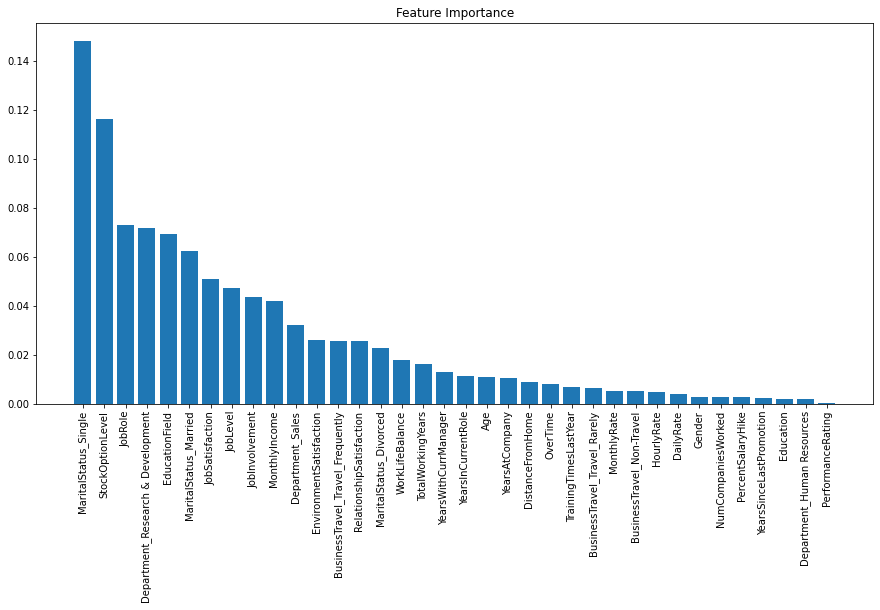

In [ ]:
Gri# Feature importance
import numpy as np 
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)
clf.fit(X_sm, y_sm)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_sm.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

# **What are the Hyper-parameters of RF?**

Now lets see  various hyper parameters of Random Forest
* Note that we consider the whole dataset $D$ not only the $D_{train}$ which is split into train data set for base learners 

**What are the hyper parameters for random forest?**
 

### 1. Number of Trees($k$)

**What happens if number of base learners ($k$) increases?**

* As $k$ increases, we Aggregate more number of base learners
* We already saw that, Aggregation decreases the varaince without any significant increase in the bias.
* Hence, we can say that we avoid overfitting.




<img src='https://drive.google.com/uc?id=1ZJB00f8_E465mwVr6h_FEZ1KwDMTkM9d'>


**What if my base learners underfit instead being overfit?**

* If the base learners underfit, the varaince is  already low
* Hence the aggregation which should reduce the variance doesn't work as expected.

### 2. Row sample size ($m$)



* In some libraries $\frac{m}{n}$ is also considered where this value becomes maximum i.e 1 ,when $m=n$

**What happens when $m=n$ ? ($d=d'$)**
* All  Base learners overfit on the whole data and they be similar. 
* So, as the $\frac{m}{n}$ increases the over-fitting of the model  increases

### 3. Number of columns Sampled ($d'$)
* Consider $m=n$


* As $\frac{d'}{d}$ increases, then all the features are being  used by each of the tree.
* This implies the overfitting increases i.e the variance increases  


### 4. Depth of Base learners 
* This is optional, some libraries let us use this when we dont want to use the Out Of Bag (OOB) data  fro cross validation 
* As depth increases, the overfitting increases 
 * When the ratios $\frac{m}{n}$ and $\frac{d'}{d}$ are very less, that is when the base leraners are seeing very few columns and rows , and when the number of trees increases ($k$) the overfitting chances are low.  




<img src='https://drive.google.com/uc?id=1fxH8dxv8mvAJM8SucB54Q4kBpudeBnzS'>



<img src='https://drive.google.com/uc?id=1kvcAmHsp6HMVhi3r0s_OqU-waLTKqwOk'>


There are also other hyper-parameters same as DTs

### Sklearn library (terms and usage):



https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


<img src='https://drive.google.com/uc?id=1xX95OGPg52IwYlSfPKqQPZRFuvOl8wYQ'>

# Note

- There’s one more that uses bagging principle: **Bagging meta estimator**. Here, base learners can be any model

- RF is just an extension to bagging meta estimator with base learners as trees.

- The only difference in bagging meta estimator and RF is RF also does feature sampling along with row sampling.

Refer: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html